In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
def shuffle_examples(X,y):
  p = np.random.permutation(len(X))
  return X[p],y[p]

def split_train_validation_test(X,y,p_t,p_tv):
  n = int(p_t*len(X))
  m = int(p_tv*len(X))
  return X[:n],y[:n],X[n:m],y[n:m],X[m:],y[m:]   

def scale(x):
  mu = np.mean(x,axis=0)
  st = np.std(x,axis=0)
  return (x-mu)/st,mu,st  

def sigmoid(x):
  return 1/(1+np.exp(-x))

def predictions(X,w,b):  
  return sigmoid(np.matmul(X,w)+b)

def predictions_scaling(X,X_mean,X_std,w,b):
  return predictions((X-X_mean)/X_std,w,b)
  
def error(y,y_hat):
  return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/len(y)  

def error_gradient_w_reg(X,y,y_hat,w,la):
  return np.matmul(y_hat-y,X)/len(y) + 2*la*w/len(y)

def error_derivative_b(X,y,y_hat):
  return np.sum(y_hat-y)/len(y)      

def steepest(X,y,r,epochs,la):
  k = X.shape[1]
  w = 0.1*np.random.randn(k)
  b = 0
  J_list = np.empty(0,float)
  for i in range(epochs):
    y_hat = predictions(X,w,b)
    J_list = np.append(J_list,[error(y,y_hat)])  
    w = w - r*error_gradient_w_reg(X,y,y_hat,w,la)
    b = b - r*error_derivative_b(X,y,y_hat)
  y_hat = predictions(X,w,b) 
  J_list = np.append(J_list,[error(y,y_hat)])  
  return w,b,J_list 

def accuracy_recall_precision(y_hat,y):
  y_hat_cat = 1*(y_hat > 0.5)
  correct_predictions = np.sum(y_hat_cat == y)
  predictions = len(y)
  true_positives = np.sum((y_hat_cat == 1) & (y == 1))
  positives = np.sum(y)
  predicted_positives = np.sum(y_hat_cat)
  accuracy = correct_predictions/predictions
  recall = true_positives/positives
  precision = true_positives/predicted_positives
  return accuracy, recall, precision  

def powers(X,d):
  X_p = X
  for k in range(2,d+1):
    for s in range(k+1):
      X_p = np.c_[X_p,X[:,0]**(k-s)*X[:,1]**s]
  return X_p   

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/microchips.csv')

In [14]:
X = df[['feature 1','feature 2']].values
y = df['pass = 1'].values
np.random.seed(10)
X,y = shuffle_examples(X,y)

train_proportion = 0.7 
train_validation_proportion = 0.85 
X_train,y_train,X_validation,y_validation,X_test,y_test = split_train_validation_test(X,y,train_proportion,train_validation_proportion)

cross entropy error train = 0.5363080856492678
train, accuracy, recall, pecision = (0.7560975609756098, 0.9, 0.6923076923076923)

cross entropy error validation = 0.6036355764888122
validation, accuracy, recall, pecision = (0.6111111111111112, 0.7142857142857143, 0.5)

cross entropy error test = 0.45614342269120933
test, accuracy, recall, pecision = (1.0, 1.0, 1.0)



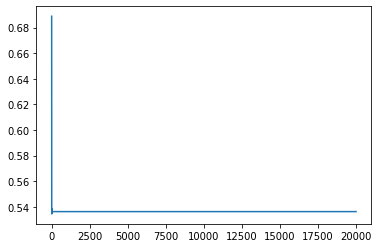

In [40]:
d = 8
X_train_p = powers(X_train,d)  
X_train_p_scaled, X_train_p_mean, X_train_p_std = scale(X_train_p)

r = 1
epochs = 20000
la = 20
w, b, J_list = steepest(X_train_p_scaled,y_train,r,epochs,la)
plt.plot(J_list)

y_hat_train = predictions_scaling(X_train_p,X_train_p_mean,X_train_p_std,w,b)
print('cross entropy error train =', error(y_train,y_hat_train))
print('train, accuracy, recall, pecision =', accuracy_recall_precision(y_hat_train,y_train))
print('')

X_validation_p = powers(X_validation,d)
y_hat_validation = predictions_scaling(X_validation_p,X_train_p_mean,X_train_p_std,w,b)
print('cross entropy error validation =',error(y_validation,y_hat_validation))
print('validation, accuracy, recall, pecision =', accuracy_recall_precision(y_hat_validation,y_validation))
print('')

X_test_p = powers(X_test,d)
y_hat_test = predictions_scaling(X_test_p,X_train_p_mean,X_train_p_std,w,b)
print('cross entropy error test =', error(y_test,y_hat_test))
print('test, accuracy, recall, pecision =', accuracy_recall_precision(y_hat_test,y_test))
print('')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


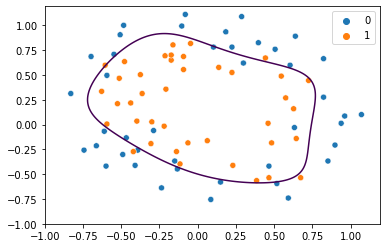

In [55]:
sns.scatterplot(X_train[:,0],X_train[:,1],hue=y_train)
xl, xr, dx = -1, 1.2, 0.01
yl, yr, dy = -1, 1.2, 0.01
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = u.reshape(1,len(u))
v_r = v.reshape(len(v),1)
f_grid = b*np.ones((len(v),len(u))) 
r = 0
for k in range(1,d+1):
    for s in range(k+1):
      f_grid = f_grid + w[r]*((u_r**(k-s)*v_r**s)-X_train_p_mean[r])/X_train_p_std[r]
      r = r+1
plt.contour(u,v,f_grid,levels=[0])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


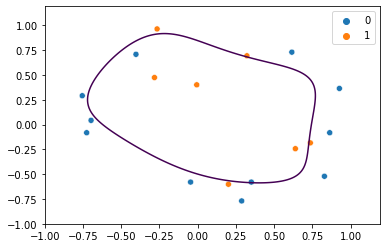

In [56]:
sns.scatterplot(X_validation[:,0],X_validation[:,1],hue=y_validation)
plt.contour(u,v,f_grid,levels=[0])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


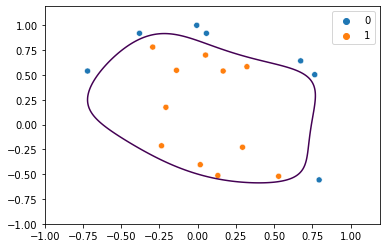

In [57]:
sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test)
plt.contour(u,v,f_grid,levels=[0])

In [51]:
d = 8
r = 1
epochs = 1000
J_validation = np.empty(0)
J_train = np.empty(0)
las = np.arange(0.6,0.75,0.001)
X_train_p = powers(X_train,d)
X_train_p_scaled, X_train_p_mean, X_train_p_std = scale(X_train_p)

for la in las:

  w, b, J_list = steepest(X_train_p_scaled,y_train,r,epochs,la)
#  plt.plot(J_list)

  y_hat_train = predictions_scaling(X_train_p,X_train_p_mean,X_train_p_std,w,b)
  J_train = np.append(J_train,error(y_train,y_hat_train))

  X_validation_p = powers(X_validation,d)
  y_hat_validation = predictions_scaling(X_validation_p,X_train_p_mean,X_train_p_std,w,b)
  J_validation = np.append(J_validation,error(y_validation,y_hat_validation))

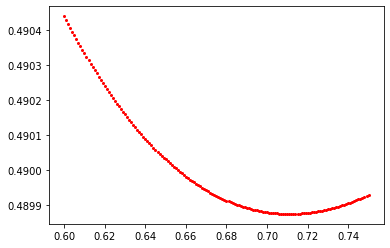

In [52]:
#plt.plot(las,J_train,'ko',markersize = 2)
plt.plot(las,J_validation,'ro',markersize = 2)

In [53]:
w, b, J_list = steepest(X_train_p_scaled,y_train,r,4000,0.71)
#  plt.plot(J_list)

y_hat_train = predictions_scaling(X_train_p,X_train_p_mean,X_train_p_std,w,b)
J_train = np.append(J_train,error(y_train,y_hat_train))

X_validation_p = powers(X_validation,d)
y_hat_validation = predictions_scaling(X_validation_p,X_train_p_mean,X_train_p_std,w,b)
J_validation = np.append(J_validation,error(y_validation,y_hat_validation))

In [54]:
J_validation[-1]

0.48987419000295884

In [58]:
y_hat_train = predictions_scaling(X_train_p,X_train_p_mean,X_train_p_std,w,b)
print('cross entropy error train =', error(y_train,y_hat_train))
print('train, accuracy, recall, pecision =', accuracy_recall_precision(y_hat_train,y_train))
print('')

X_validation_p = powers(X_validation,d)
y_hat_validation = predictions_scaling(X_validation_p,X_train_p_mean,X_train_p_std,w,b)
print('cross entropy error validation =',error(y_validation,y_hat_validation))
print('validation, accuracy, recall, pecision =', accuracy_recall_precision(y_hat_validation,y_validation))
print('')

X_test_p = powers(X_test,d)
y_hat_test = predictions_scaling(X_test_p,X_train_p_mean,X_train_p_std,w,b)
print('cross entropy error test =', error(y_test,y_hat_test))
print('test, accuracy, recall, pecision =', accuracy_recall_precision(y_hat_test,y_test))
print('')


cross entropy error train = 0.3458463739750278
train, accuracy, recall, pecision = (0.8536585365853658, 0.9, 0.8181818181818182)

cross entropy error validation = 0.48987419000295884
validation, accuracy, recall, pecision = (0.6666666666666666, 0.42857142857142855, 0.6)

cross entropy error test = 0.26332543943764125
test, accuracy, recall, pecision = (1.0, 1.0, 1.0)

